##Task 1.1 Data Preparation

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1 

Duplicate count :  1 

Duplicate rows: 
          RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
38  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1 

Duplicate count after drop :  0 

Missing count:  0 

Before scaling RI       0.02278
Na       6.65000
Mg       4.49000
Al       3.21000
Si       5.60000
K        6.21000
Ca      10.76000
Ba       3.15000
Fe       0.51000
Type     6.00000
dtype: float64 



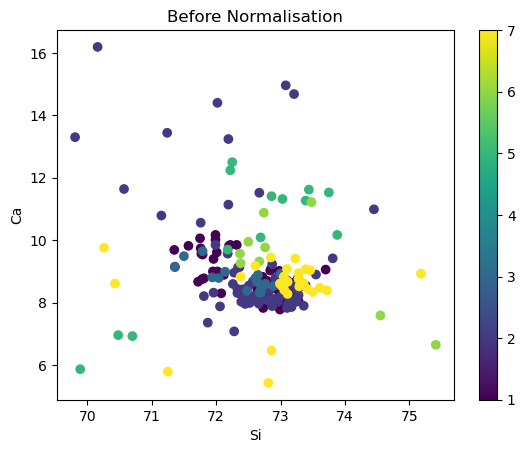

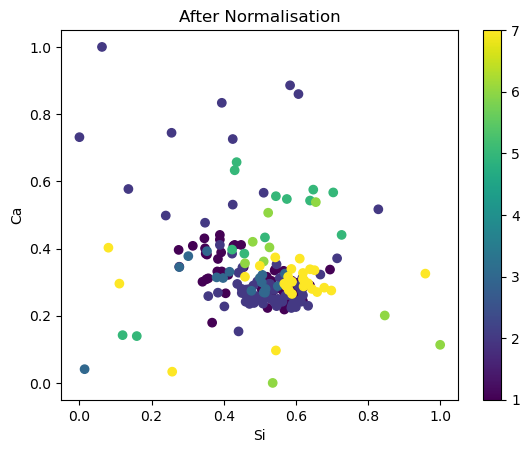

After scaling RI      1.0
Na      1.0
Mg      1.0
Al      1.0
Si      1.0
K       1.0
Ca      1.0
Ba      1.0
Fe      1.0
Type    6.0
dtype: float64


In [100]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

########################## LOAD DATASET ##########################
data = pd.read_csv("glass_dataset.csv") #load dataset
print(data.head(5), "\n") #print first 5 rows to verify



########################## CHECK FOR DUPLICATES ##########################
print("Duplicate count : ",data.duplicated().sum(), "\n") #print number of duplicates
print("Duplicate rows: \n", data[data.duplicated(keep=False)], "\n") #print present duplicate rows
data = data.drop_duplicates() #drop duplicates from our set
print("Duplicate count after drop : ",data.duplicated().sum(), "\n") #print number of duplicates to verify



########################## CHECK FOR MISSING VALUES ##########################
print("Missing count: ",data.isnull().sum().sum(), "\n")



########################## NORMALISE DATASET ##########################
print("Before scaling", data.max() - data.min(), "\n") #print the range before scaling
inputs = data.drop(columns=["Type"]) #separate the inputs (features) from the targets (glass types) 
targets = data["Type"]  

#pick 2 columns to investigate normalisation effects with 
input_1 = "Si"
input_2 = "Ca"

# plot columns Si and Ca before normalisation with a scatter graph
plt.scatter(inputs[input_1] ,inputs[input_2],c = targets , cmap = "viridis" )
plt.colorbar()
plt.title("Before Normalisation")
plt.xlabel(input_1)
plt.ylabel(input_2)
plt.show()

scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)
data = pd.DataFrame(scaled, columns=inputs.columns)
data["Type"] = targets

# plot columns Si and Ca after normalisation with a scatter graph
plt.scatter(data[input_1], data[input_2], c=data["Type"], cmap="viridis")
plt.colorbar()
plt.title("After Normalisation")
plt.xlabel(input_1)
plt.ylabel(input_2)
plt.show()

print("After scaling", data.max() - data.min()) #print the range after scaling to further verify success 